In [55]:
pip install mlflow

  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached alembic-1.15.1-py3-none-any.whl.metadata (7.2 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_metadata-8.6.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached opentelemetry_api-1.31.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached opentelemetry_sdk-1.31.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universa

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.lightgbm

In [57]:
pd.set_option('display.max_columns', None)

# import kagglehub
# from kagglehub import KaggleDatasetAdapter

In [14]:
# data = pd.read_csv('data/loan_approval_dataset.csv')
data = pd.read_csv('data/train_and_test2.csv')

In [18]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

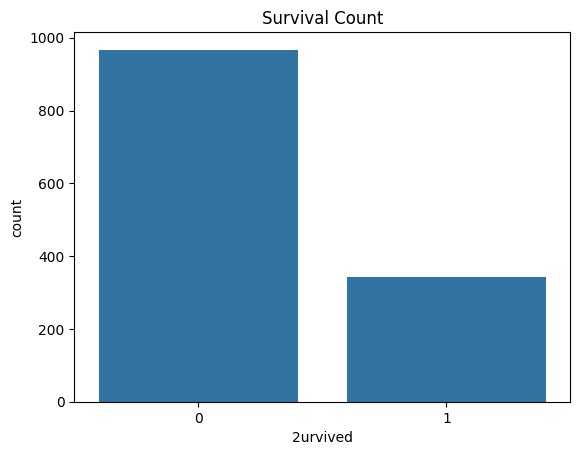

In [22]:
sns.countplot(x='2urvived', data=data)
plt.title('Survival Count')
plt.show()

In [26]:
use_cols =  [ col for col in data.columns if "zero." not in col ]
data = data[use_cols]

In [28]:
print(data.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64


In [29]:
if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [39]:
categorical_features = ['Sex', 'Pclass', 'Embarked']
features = [ col for col in data.columns if col not in ['Passengerid','2urvived']]

In [ ]:
X = data.copy()
y = data['2urvived']
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [63]:
# test_data = lgbm.Dataset(data=X_test, label=y_test, categorical_feature=categorical_features, free_raw_data=False)
# train_data = lgbm.Dataset(data=X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
initial_model = lgbm.train({}, lgbm.Dataset(X_train, label=y_train, categorical_feature=categorical_features), 100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] Start training from score 0.256925


In [64]:
y_pred_initial = initial_model.predict(X_test)
f1_initial = f1_score(y_test, (y_pred_initial > 0.5).astype(int))

# Display F1 Score and Confusion Matrix
print(f"Initial F1 Score: {f1_initial}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, (y_pred_initial > 0.5).astype(int)))

Initial F1 Score: 0.5072463768115942
Confusion Matrix:
[[159  30]
 [ 38  35]]


In [ ]:
params = {
        'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
    }

In [52]:
evaluation_results = {}
clf = lgbm.train(
                 train_set=train_data,
                 params=params,
                 valid_sets=[train_data, test_data], 
                 valid_names=['Train', 'Test'],
                #  evals_result=evaluation_results,
                 num_boost_round=500,
                #  early_stopping_rounds=100,
                #  verbose_eval=20,
                )
optimum_boost_rounds = clf.best_iteration

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [53]:
optimum_boost_rounds

0

In [65]:
1+1

2